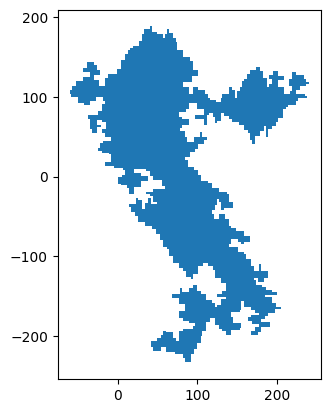

part one answer: 45159.0


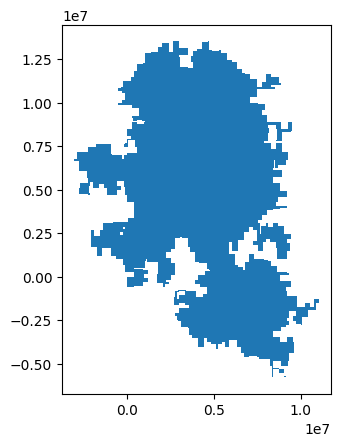

part two answer: 134549294799713.0


In [3]:
# https://gitlab.com/olegsson/aoc/-/blob/main/2023/18.py

import re
import numpy as np
import shapely
import geopandas as gp
import matplotlib.pyplot as plt

blueprint = [
    (d.lower(), int(l), re.sub(r"[()]", "", c))
    for d, l, c in np.loadtxt("day.dat", object, comments=None)
]

def area(plan):
    moves = (
        np.array([
            l * (d in "rl"),
            l * (d in "ud"),
        ]) * (1 - 2 * (d in "ld"))
        for d, l, *_ in plan
    )
    v = np.array([[0, 0]])
    i=0
    for m in moves:
        i+=1
        # print(i)
        v = np.append(v, [v[-1]+m], axis=0)
        # print(v)
    p = shapely.Polygon(v)
    myPoly = gp.GeoSeries([p])
    myPoly.plot()
    plt.show()
    p = p.union(shapely.Polygon(v+[1, 0]))
    p = p.union(shapely.Polygon(shapely.get_coordinates(p)+[0, 1]))

    # output geometry for fun
    # gp.GeoDataFrame(geometry=[p]).to_file("tmp.geojson", driver="GeoJSON")
    return p.area

print("part one answer:", area(blueprint))

dtrans = str.maketrans("0123", "rdlu")
blueprint = [
    (c[-1].translate(dtrans), int(c[1:-1], 16))
    for *_, c in blueprint
]

print("part two answer:", area(blueprint))

